In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os, glob

In [2]:
from ipynb.fs.defs.Mosquitodataset1_Yearlybatchdata import yearlyfile, batch1, batchdf1

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [3]:
mos = yearlyfile("Mosquito yearly.xlsx",'U-C')[0]
mosyr = yearlyfile("Mosquito yearly.xlsx",'U-C')[1]
batch = batch1(mosyr,mos)
batchdf = batchdf1(mos)

In [4]:
def batchyr(yr):
    byr = batchdf[batchdf['date'].dt.year==yr]
    return byr

In [5]:
byr = [batchyr(i) for i in mosyr]
diff = [[(i['date'].iloc[j+1]-i['date'].iloc[j]).days for j in range(len(i['date'])-1)] for i in byr]

In [6]:
mosperiod = [sum(i) for i in diff] # Diff is an array of difference between two consecutive dates on which batches occured for all the years

Text(0.5, 1.0, 'Total batches in a yr vs. total span of their occurence')

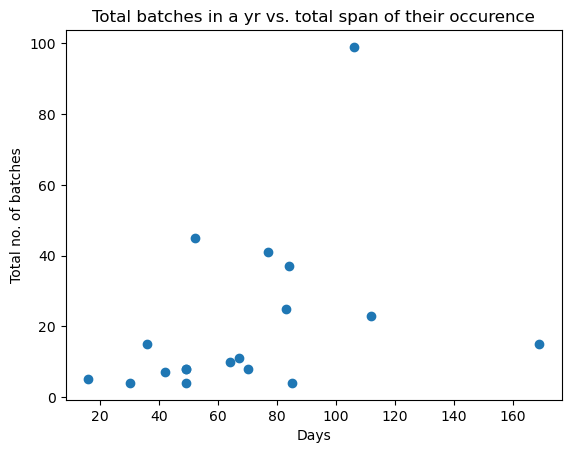

In [8]:
#plt.plot(mosperiod)
# plt.plot(batch)
m,b = zip(*sorted(zip(mosperiod,batch)))
plt.scatter(m,b)  #Plot between total period within which mosq. batches occured and total no. of batches in that year
plt.xlabel('Days')
plt.ylabel('Total no. of batches')
plt.title('Total batches in a yr vs. total span of their occurence')

In [7]:
mosprmean = [sum(i)/len(i) for i in diff] #Mean gap between occurence of batches

Text(0.5, 1.0, 'Mean gap period between occurence of batches')

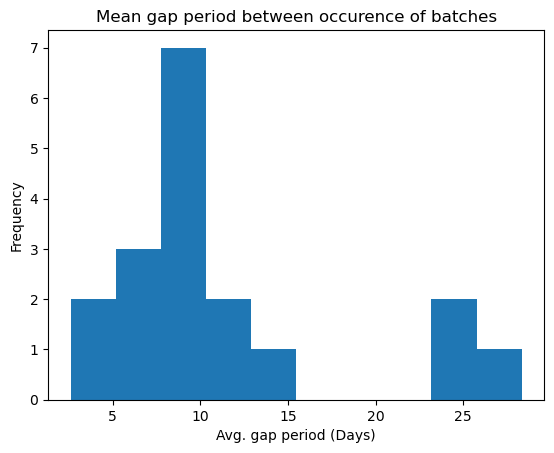

In [10]:
#plt.scatter(mosyr,mosprmean)
plt.hist(mosprmean)
plt.xlabel('Avg. gap period (Days)')
plt.ylabel('Frequency')
plt.title('Mean gap period between occurence of batches')
#plt.plot(diff)

'\n Plot to check the relation between difference in two consecutive dates of batch occurence and \n their spread over the period in each years \n'

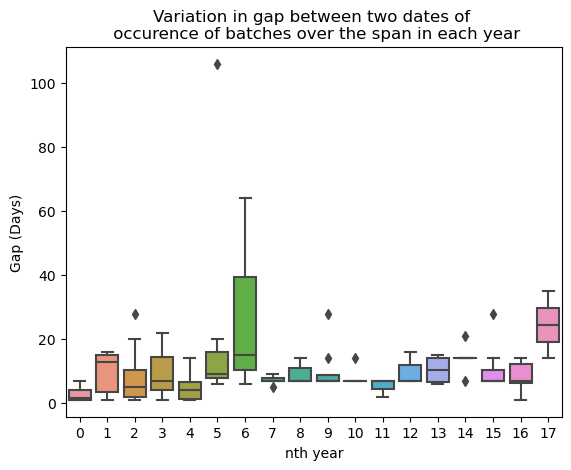

In [11]:
# for i in diff:
#     plt.scatter(range(len(i)),i)
# plt.legend(mosyr) 
import seaborn as sns
sns.boxplot(diff)
plt.title('Variation in gap between two dates of \n occurence of batches over the span in each year')
plt.xlabel('nth year')
plt.ylabel('Gap (Days)')
"""
 Plot to check the relation between difference in two consecutive dates of batch occurence and 
 their spread over the period in each years 
"""

In [12]:
##Comparing number of steps in which batches occured vs total period within which batches occured
[(len(diff[i]),mosperiod[i]) for i in range(len(diff))]

[(20, 52),
 (7, 67),
 (10, 83),
 (3, 30),
 (22, 106),
 (7, 169),
 (3, 85),
 (5, 36),
 (7, 64),
 (8, 84),
 (10, 77),
 (3, 16),
 (5, 49),
 (4, 42),
 (5, 70),
 (11, 112),
 (6, 49),
 (2, 49)]

Text(0, 0.5, 'Batches and steps')

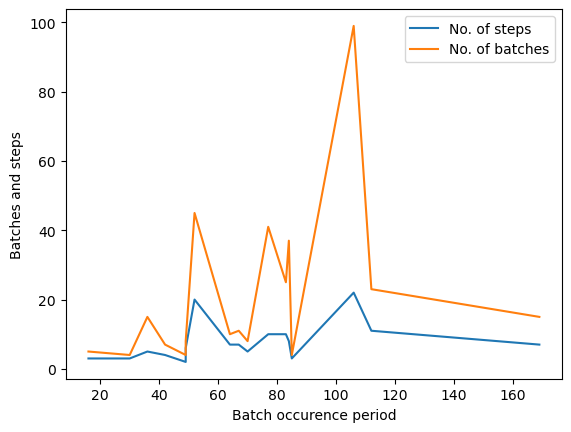

In [13]:
m,c = zip(*sorted(zip(mosperiod,[len(i) for i in diff])))
plt.plot(m,c) #No. of steps vs total period
plt.plot(m,b) #No. of batches vs total period
plt.legend(['No. of steps','No. of batches'])
plt.xlabel('Batch occurence period')
plt.ylabel('Batches and steps')

0.9002520853040511


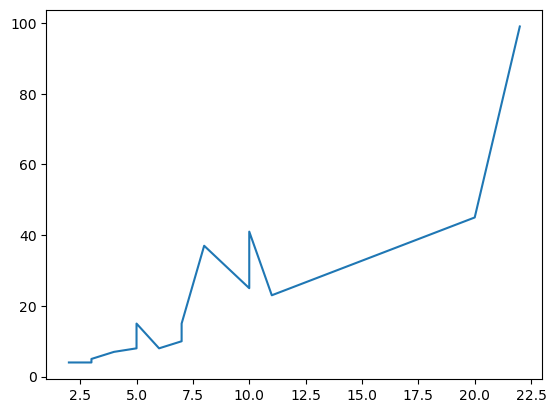

In [14]:
c1,b1 = zip(*sorted(zip(c,b)))
plt.plot(c1,b1)
from scipy.stats import pearsonr
corr, _ = pearsonr(c1,b1)
print(corr)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 6)'>

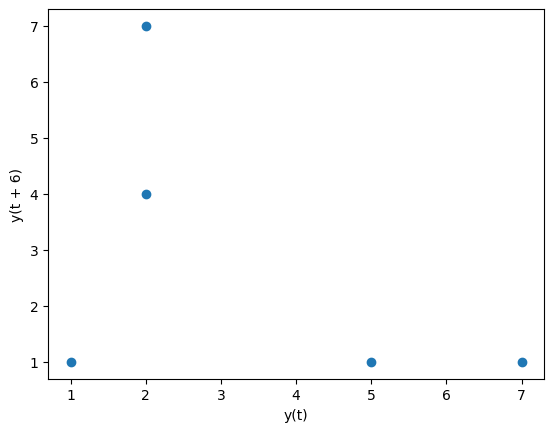

In [15]:
pd.plotting.lag_plot(byr[10]['batches'], lag=6) ##Checking if there's autocorrelation in mosquito batches

In [7]:
csv=[pd.read_csv(f) for f in glob.glob("/data/dhence/a/pborse2/inputdata/ISWS_data/Champaign/*.csv")]

In [8]:
from ipynb.fs.full.ISWSdataset_Champaign import aprnov

In [9]:
def clim(index):
    climyr = aprnov(csv)[index]
    return climyr

In [10]:
from ipynb.fs.defs.Individual_year_analysis import lag, lagconcat, threshold
#lag takes arguments as ouput of batchyr, clim and the year respectively
#lagconcat takes argument as ouput of lag 
#threshold takes argument as output of lagconcat

In [11]:
#Example of calling these functions
threshold(lagconcat(lag(batchyr(2003),clim(4),2003)))

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

([[array([ 0.254,  0.   ,  0.254,  0.   , 23.622,  1.778]),
   array([ 6.858,  0.   ,  0.254,  0.   , 23.622, 25.4  ]),
   array([ 6.858,  0.   ,  0.254,  0.   , 31.242, 25.4  ]),
   array([ 6.858,  0.   ,  0.254,  0.   , 31.242, 33.02 ]),
   array([ 6.858,  0.   ,  0.254,  0.   , 31.242, 33.02 ]),
   array([ 7.874,  0.   ,  0.254,  3.048, 31.496, 33.02 ]),
   array([ 7.874,  0.   ,  0.254,  3.302, 33.782, 33.274]),
   array([ 7.874,  0.   ,  0.254,  3.302, 33.782, 35.56 ]),
   array([ 8.636,  0.   ,  0.508,  3.302, 33.782, 35.56 ]),
   array([21.844,  0.   ,  0.508,  3.302, 33.782, 35.56 ]),
   array([49.784,  0.   ,  0.508,  3.302, 33.782, 35.56 ]),
   array([51.054,  0.   ,  0.508,  3.302, 33.782, 35.56 ]),
   array([51.054,  0.   ,  0.508,  3.302, 33.782, 35.56 ]),
   array([51.054,  7.874,  0.508,  3.302, 33.782, 35.56 ]),
   array([51.054,  8.636,  0.508,  3.556, 33.782, 35.56 ]),
   array([51.054,  8.636,  0.508,  3.556, 40.64 , 35.56 ]),
   array([51.054,  8.89 ,  0.508,  3.556

In [12]:
thresh = [threshold(lagconcat(lag(batchyr(mosyr[i]),clim(mosyr[i]-1999),mosyr[i]))) for i in range(len(mosyr))]

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [13]:
def dry(data,yrind,bgroupind,lagperiodind): #data argument should take data of arrays of accumulated ppts for diff batch groups
    try:
        d = pd.DataFrame(data[yrind][bgroupind][lagperiodind]) # 1st index - chooses year, 2nd index - chooses group of batches, 3rd index- chooses lagdays period - 0-21 or 21-42,...,etc
    except:
        return 'specified lagperiod doesnt fall on or after April'
    try:
        pptvals = [list(dict.fromkeys(d[i])) for i in d.columns]
        counts = [[list(d[d.columns[i]].values).count(j) for j in pptvals[i]] for i in range(len(pptvals))] 
        drydf = pd.concat([pd.DataFrame([pptvals[i],counts[i]]).T for i in range(len(counts))])
    except:
        return 'desired batchgroup doesnt exist in this year'
    return drydf

In [23]:
dry(thresh,4,2,1)

,0,1
0,0.000,8.0
1,0.254,2.0
2,1.016,3.0
3,10.414,6.0
4,14.478,2.0
0,0.000,5.0
1,4.064,7.0
2,5.080,9.0
0,0.000,1.0
1,9.398,6.0


In [24]:
for i in range(len(mosyr)):
    if(type(dry(thresh,i,2,1))!=str):
        print(i)
        print(dry(thresh,i,2,1))

0
         0     1
0    0.000   2.0
1   19.812   1.0
2   51.562   1.0
3   53.086  11.0
4   66.548   1.0
5   77.724   1.0
6  181.864   4.0
2
        0    1
0  25.908  2.0
1  27.432  1.0
2  41.148  1.0
3  46.990  4.0
4  47.498  3.0
5  54.356  4.0
6  54.864  5.0
7  64.008  1.0
4
        0     1
0   0.000   8.0
1   0.254   2.0
2   1.016   3.0
3  10.414   6.0
4  14.478   2.0
0   0.000   5.0
1   4.064   7.0
2   5.080   9.0
0   0.000   1.0
1   9.398   6.0
2  13.462   7.0
3  14.478   7.0
0   0.000   1.0
1   1.016   1.0
2  52.832  12.0
3  61.214   4.0
4  77.978   3.0
0   0.000  11.0
1   0.254   2.0
2   1.016   3.0
3  10.414   5.0
0   0.000   2.0
1   0.254   2.0
2   1.016   3.0
3  10.414   6.0
4  14.478   7.0
5  15.494   1.0
9
        0     1
0   0.000   3.0
1   0.508   1.0
2   7.112   2.0
3   7.874   2.0
4   8.890   1.0
5  21.590   2.0
6  31.496   1.0
7  36.576   1.0
8  37.338   6.0
9  37.846   2.0
0  28.702   2.0
1  31.496  15.0
2  32.004   1.0
3  38.608   2.0
4  39.370   1.0
10
        0    1

(array([3., 4., 2., 0., 2., 0., 0., 1., 0., 1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

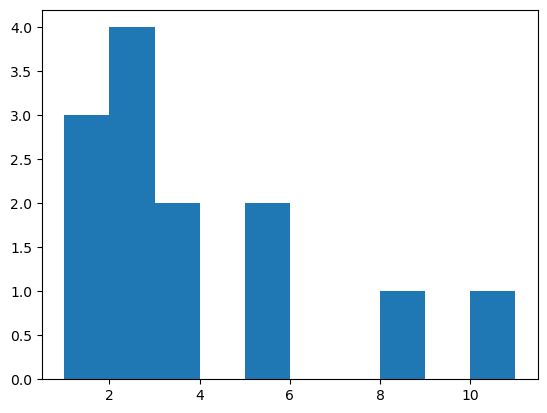

In [25]:
immdry1 = []
for i in range(len(mosyr)):
    #print(type(dry(i,1,1)[1][0]))
    if(type(dry(thresh,i,2,1)[1][0])==pd.core.series.Series):
        immdry1.append(list(dry(thresh,i,2,1)[1][0]))
    elif(type(dry(thresh,i,2,1)[1][0])==np.float64):
        immdry1.append([dry(thresh,i,2,1)[1][0]])
immdry1=sum(immdry1,[])
plt.hist(immdry1)

(array([15.,  8.,  6., 13.,  2.,  1.,  3.,  0.,  1.,  1.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

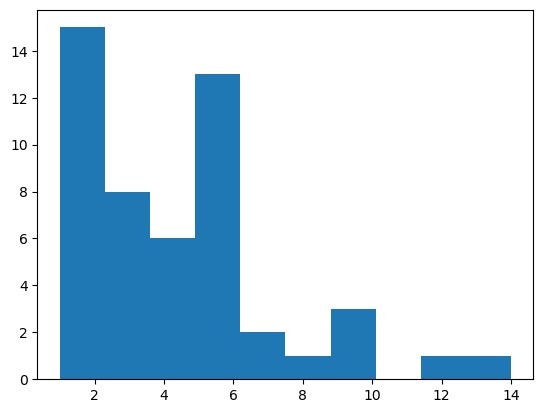

In [26]:
immdry1 = []
for i in range(len(mosyr)):
    #print(type(dry(i,1,1)[1][0]))
    if(type(dry(thresh,i,1,1)[1][0])==pd.core.series.Series):
        immdry1.append(list(dry(thresh,i,1,1)[1][0]))
    elif(type(dry(thresh,i,1,1)[1][0])==np.float64):
        immdry1.append([dry(thresh,i,1,1)[1][0]])
immdry1=sum(immdry1,[])
plt.hist(immdry1)

(array([36.,  6., 17.,  8.,  5.,  4.,  2.,  4.,  1.,  2.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

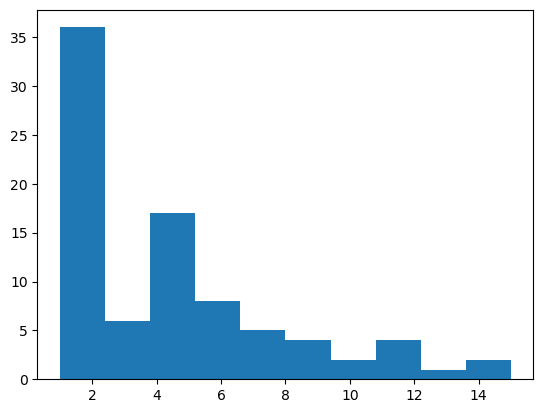

In [27]:
immdry = sum([list(dry(thresh,i,0,1)[1][0]) for i in range(len(mosyr)) if type(dry(thresh,i,0,1))!=str],[]) 
plt.hist(immdry)

In [13]:
def stat(data,ind): ##ind ranges from 0-2 - 0 means 1-21, 1 means 22-42, 2 means 43-63, data = thresh
    maxyrb1 = [list(np.max(i[0][ind],axis=1,initial=0)) for i in data if len(i[0])>1]
    maxyrb25 = [list(np.max(i[1][ind],axis=1,initial=0)) for i in data if len(i[1])>1]
    maxyrb6 = [list(np.max(i[2][ind],axis=1,initial=0)) for i in data if len(i[2])>1]
    meanyrb1 = [np.mean(i[0][ind],axis=1) for i in data if len(i[0])>1]
    meanyrb25 = [np.mean(i[1][ind],axis=1) for i in data if len(i[1])>1]
    meanyrb6 = [np.mean(i[2][ind],axis=1) for i in data if len(i[2])>1]
    minyrb1 = [np.min(i[0][ind],initial = np.inf,axis=1) for i in data if len(i[0])>1]
    minyrb25 = [np.min(i[1][ind],initial = np.inf,axis=1) for i in data if len(i[1])>1]
    minyrb6 = [np.min(i[2][ind],initial = np.inf,axis=1) for i in data if len(i[2])>1]
    return maxyrb1,maxyrb25,maxyrb6,meanyrb1,meanyrb25,meanyrb6,minyrb1,minyrb25,minyrb6

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


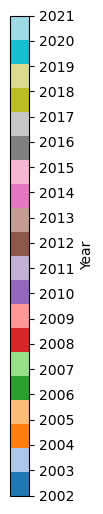

In [33]:
from mycolorpy import colorlist as mcp
color1=mcp.gen_color(cmap="tab20",n=20)
import matplotlib as mpl
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.03, 1])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical',label='Year',cmap='tab20',norm=mpl.colors.Normalize(2002, 2021),ticks=list(range(2002,2022)))
print(color1)

In [29]:
[len(i[0]) for i in thresh] #Group of 3 week periods lagging to batches in each year

[4, 4, 3, 3, 3, 1, 3, 5, 5, 3, 5, 6, 5, 5, 3, 3, 7, 5]

In [17]:
import seaborn as sns
def plot(data,ind): #argument 1 takes same data as in stat
    s=0
#     figure(figsize=(35,40))
#     figure(figsize=(25,20))
    for i in stat(data,ind)[:3]:
        s=s+1
        if s in [1,4,7]:
            title = 'No. of batches occured = 1'
        elif s in [2,5,8]:
            title = 'No. of batches occured = 2-5'
        else:
            title = 'No. of batches occured >= 6'
        figure(figsize=(6,4))
        ax= plt.subplot()
        s1=-1
        markers = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
        from mycolorpy import colorlist as mcp
        color1=mcp.gen_color(cmap="tab20",n=20)
        for j in i:
            s1=s1+1
            if(s1<=4):
                ax.scatter(range(21),j,marker=markers[s1],color=color1[s1])
            elif(s1>4 and s1<=14):
                ax.scatter(range(21),j,marker=markers[s1],color=color1[s1+2])
            else:
                ax.scatter(range(21),j,marker=markers[s1],color=color1[s1+3])
            ax.set_title(title,fontsize=15)
#             ax.legend(mosyr[:5]+mosyr[6:],fontsize=8)
            ax.set_ylim(0,175)
            ax.set_xlabel(str(ind+1)+'-3 week lag period',fontsize=14)
            if(0<s<=3):
                if(s1==0):
                    ax.set_ylabel('max. accumulated ppt in mm',fontsize=14)
#             elif(3<s<=6):
#                 ax.set_ylabel('mean accumulated ppt in mm',fontsize=20)
#             else:
#                 ax.set_ylabel('min. accumulated ppt in mm',fontsize=20)

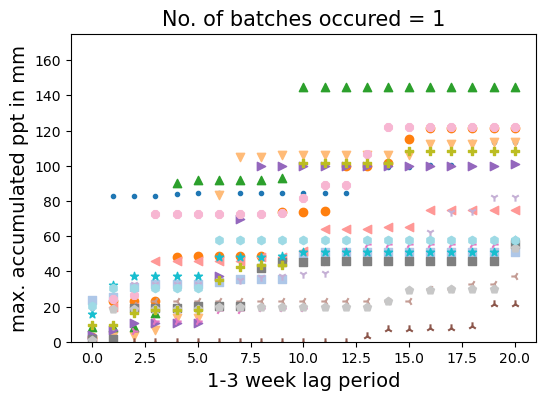

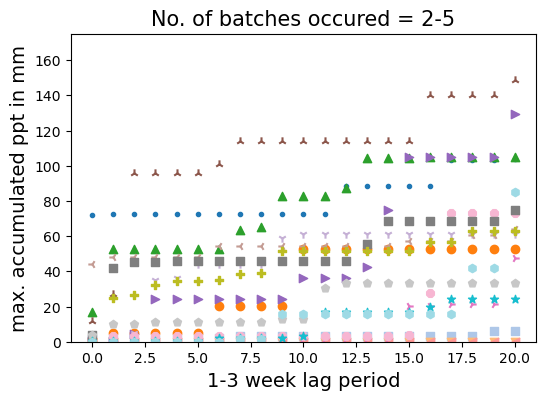

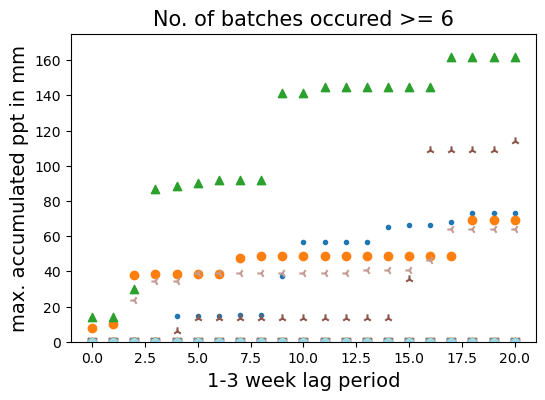

In [18]:
plot(thresh,0)

/data/keeling/a/pborse2/miniconda3/envs/geo/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/keeling/a/pborse2/miniconda3/envs/geo/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/data/keeling/a/pborse2/miniconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/data/keeling/a/pborse2/miniconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/data/keeling/a/pborse2/miniconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/data/keeling/a/pborse2/miniconda3/envs/geo/lib/python3.9/site-pac

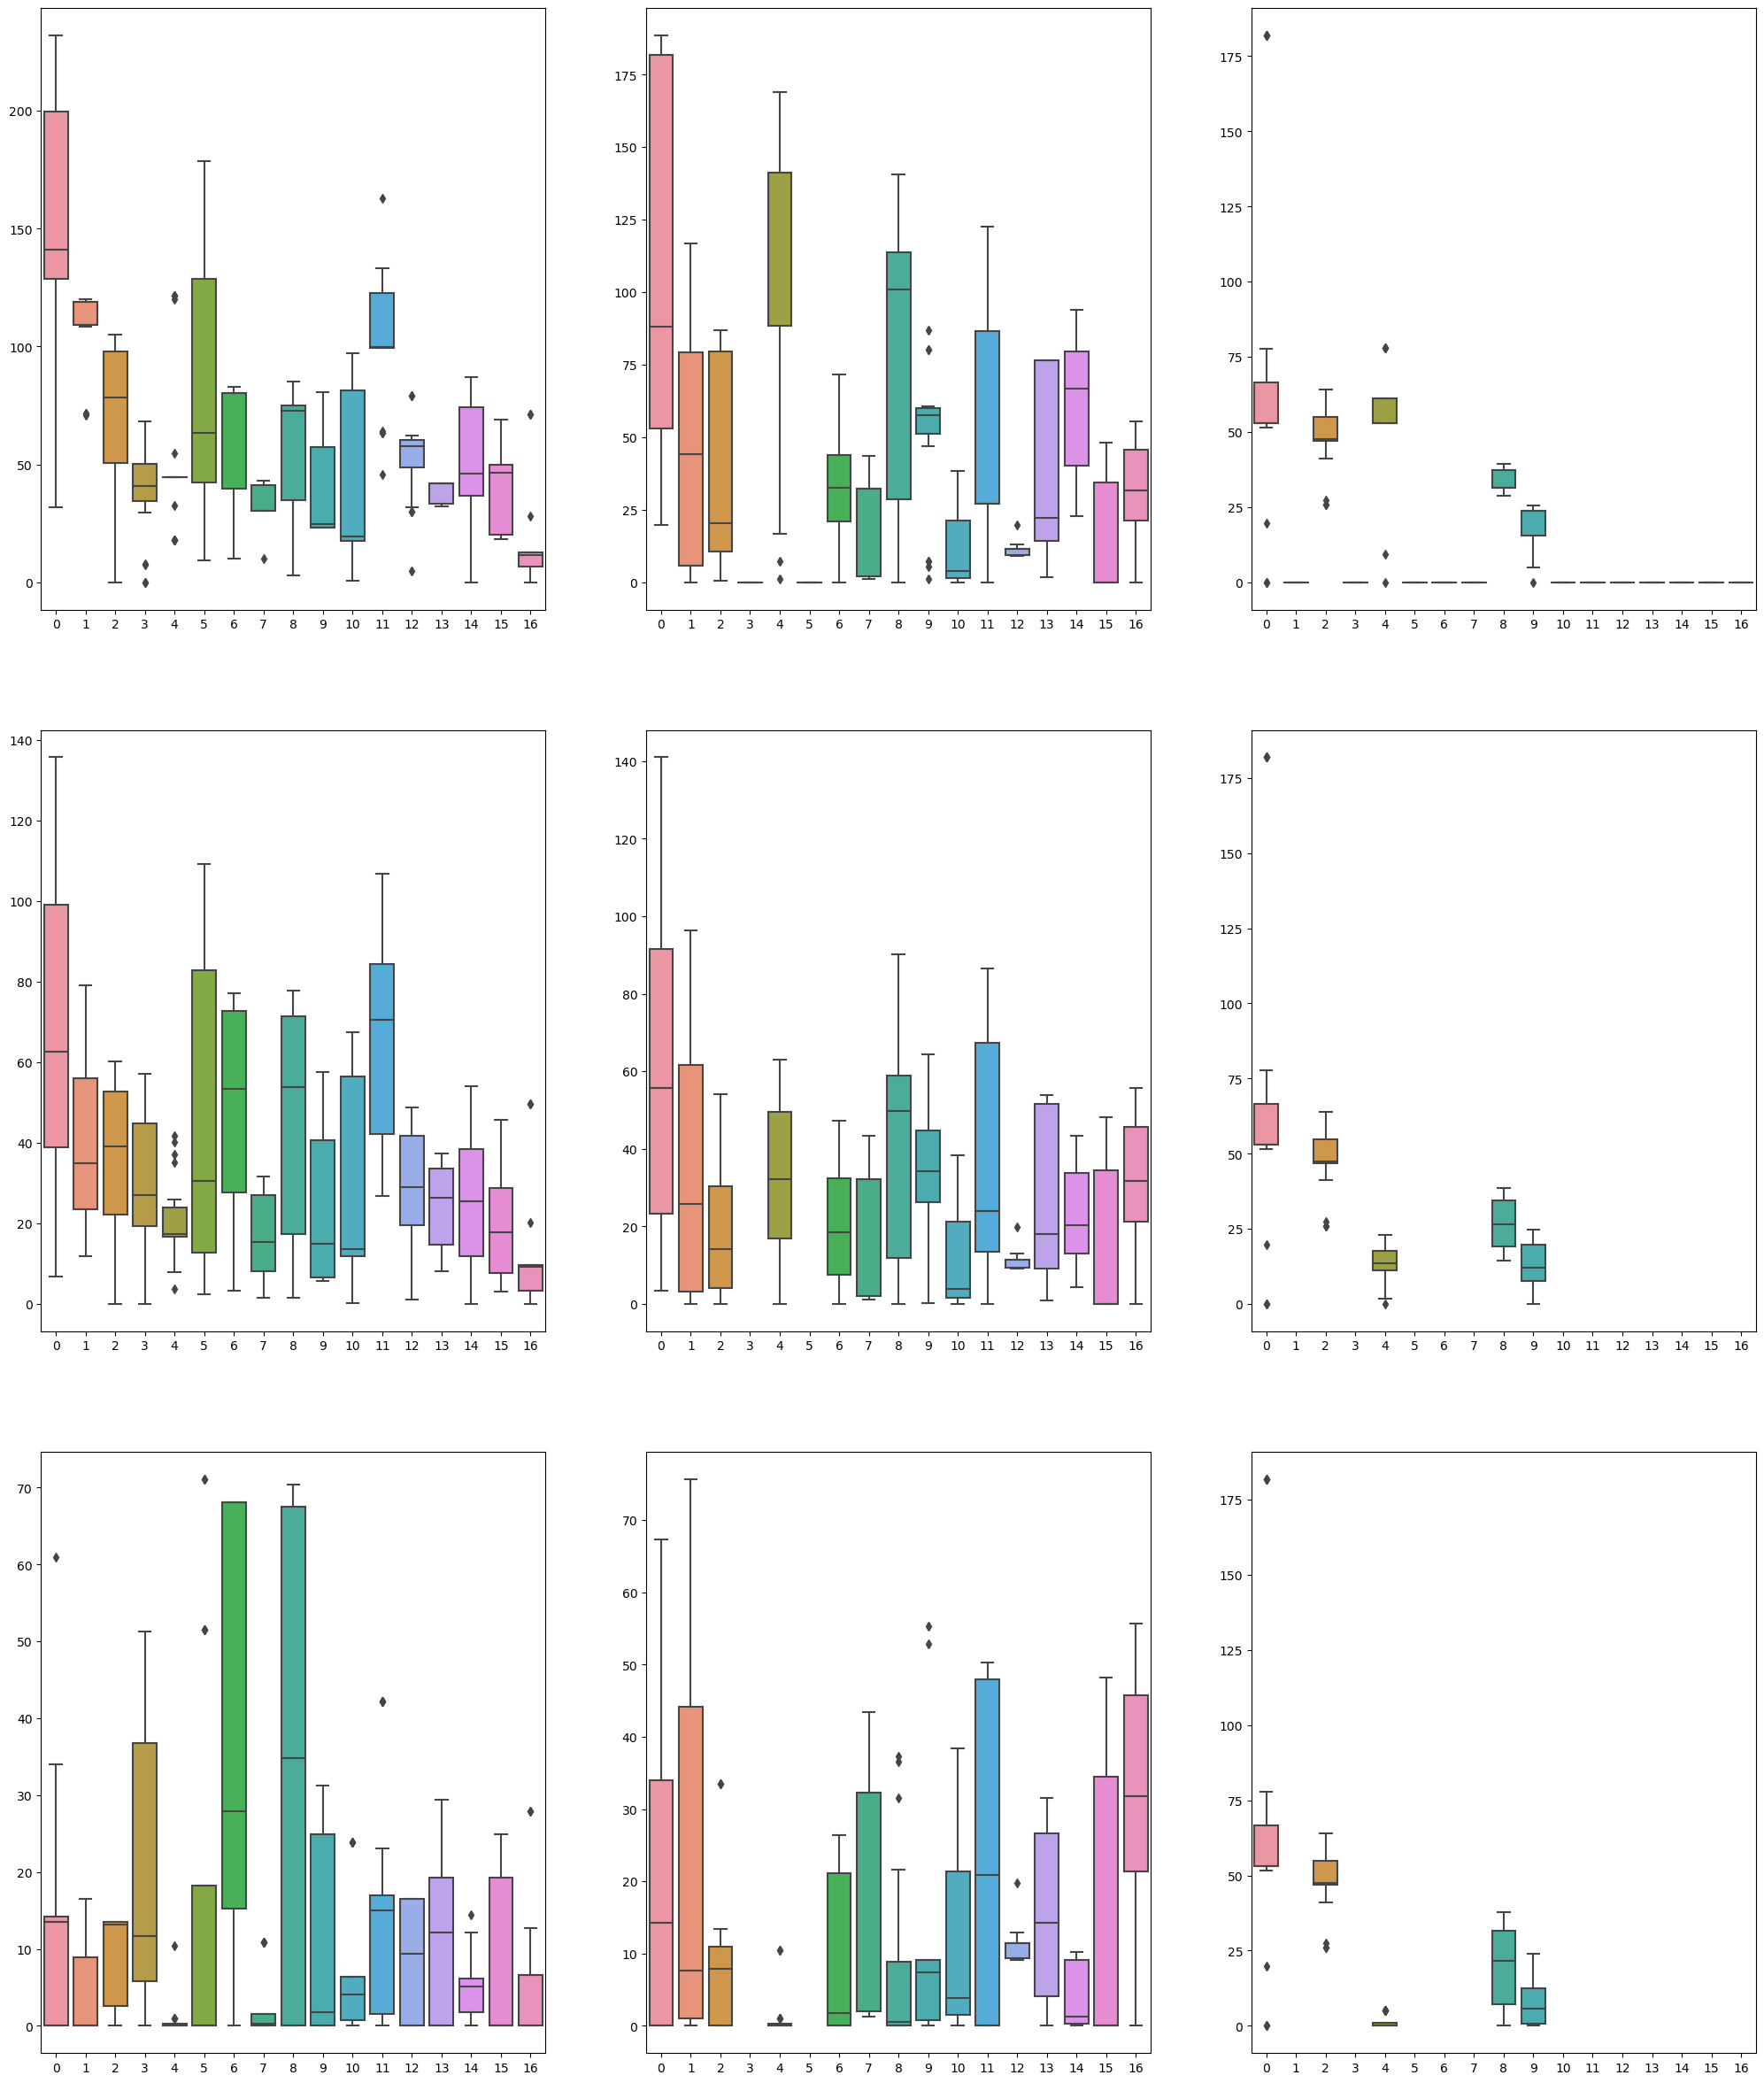

In [49]:
plot(thresh,1)

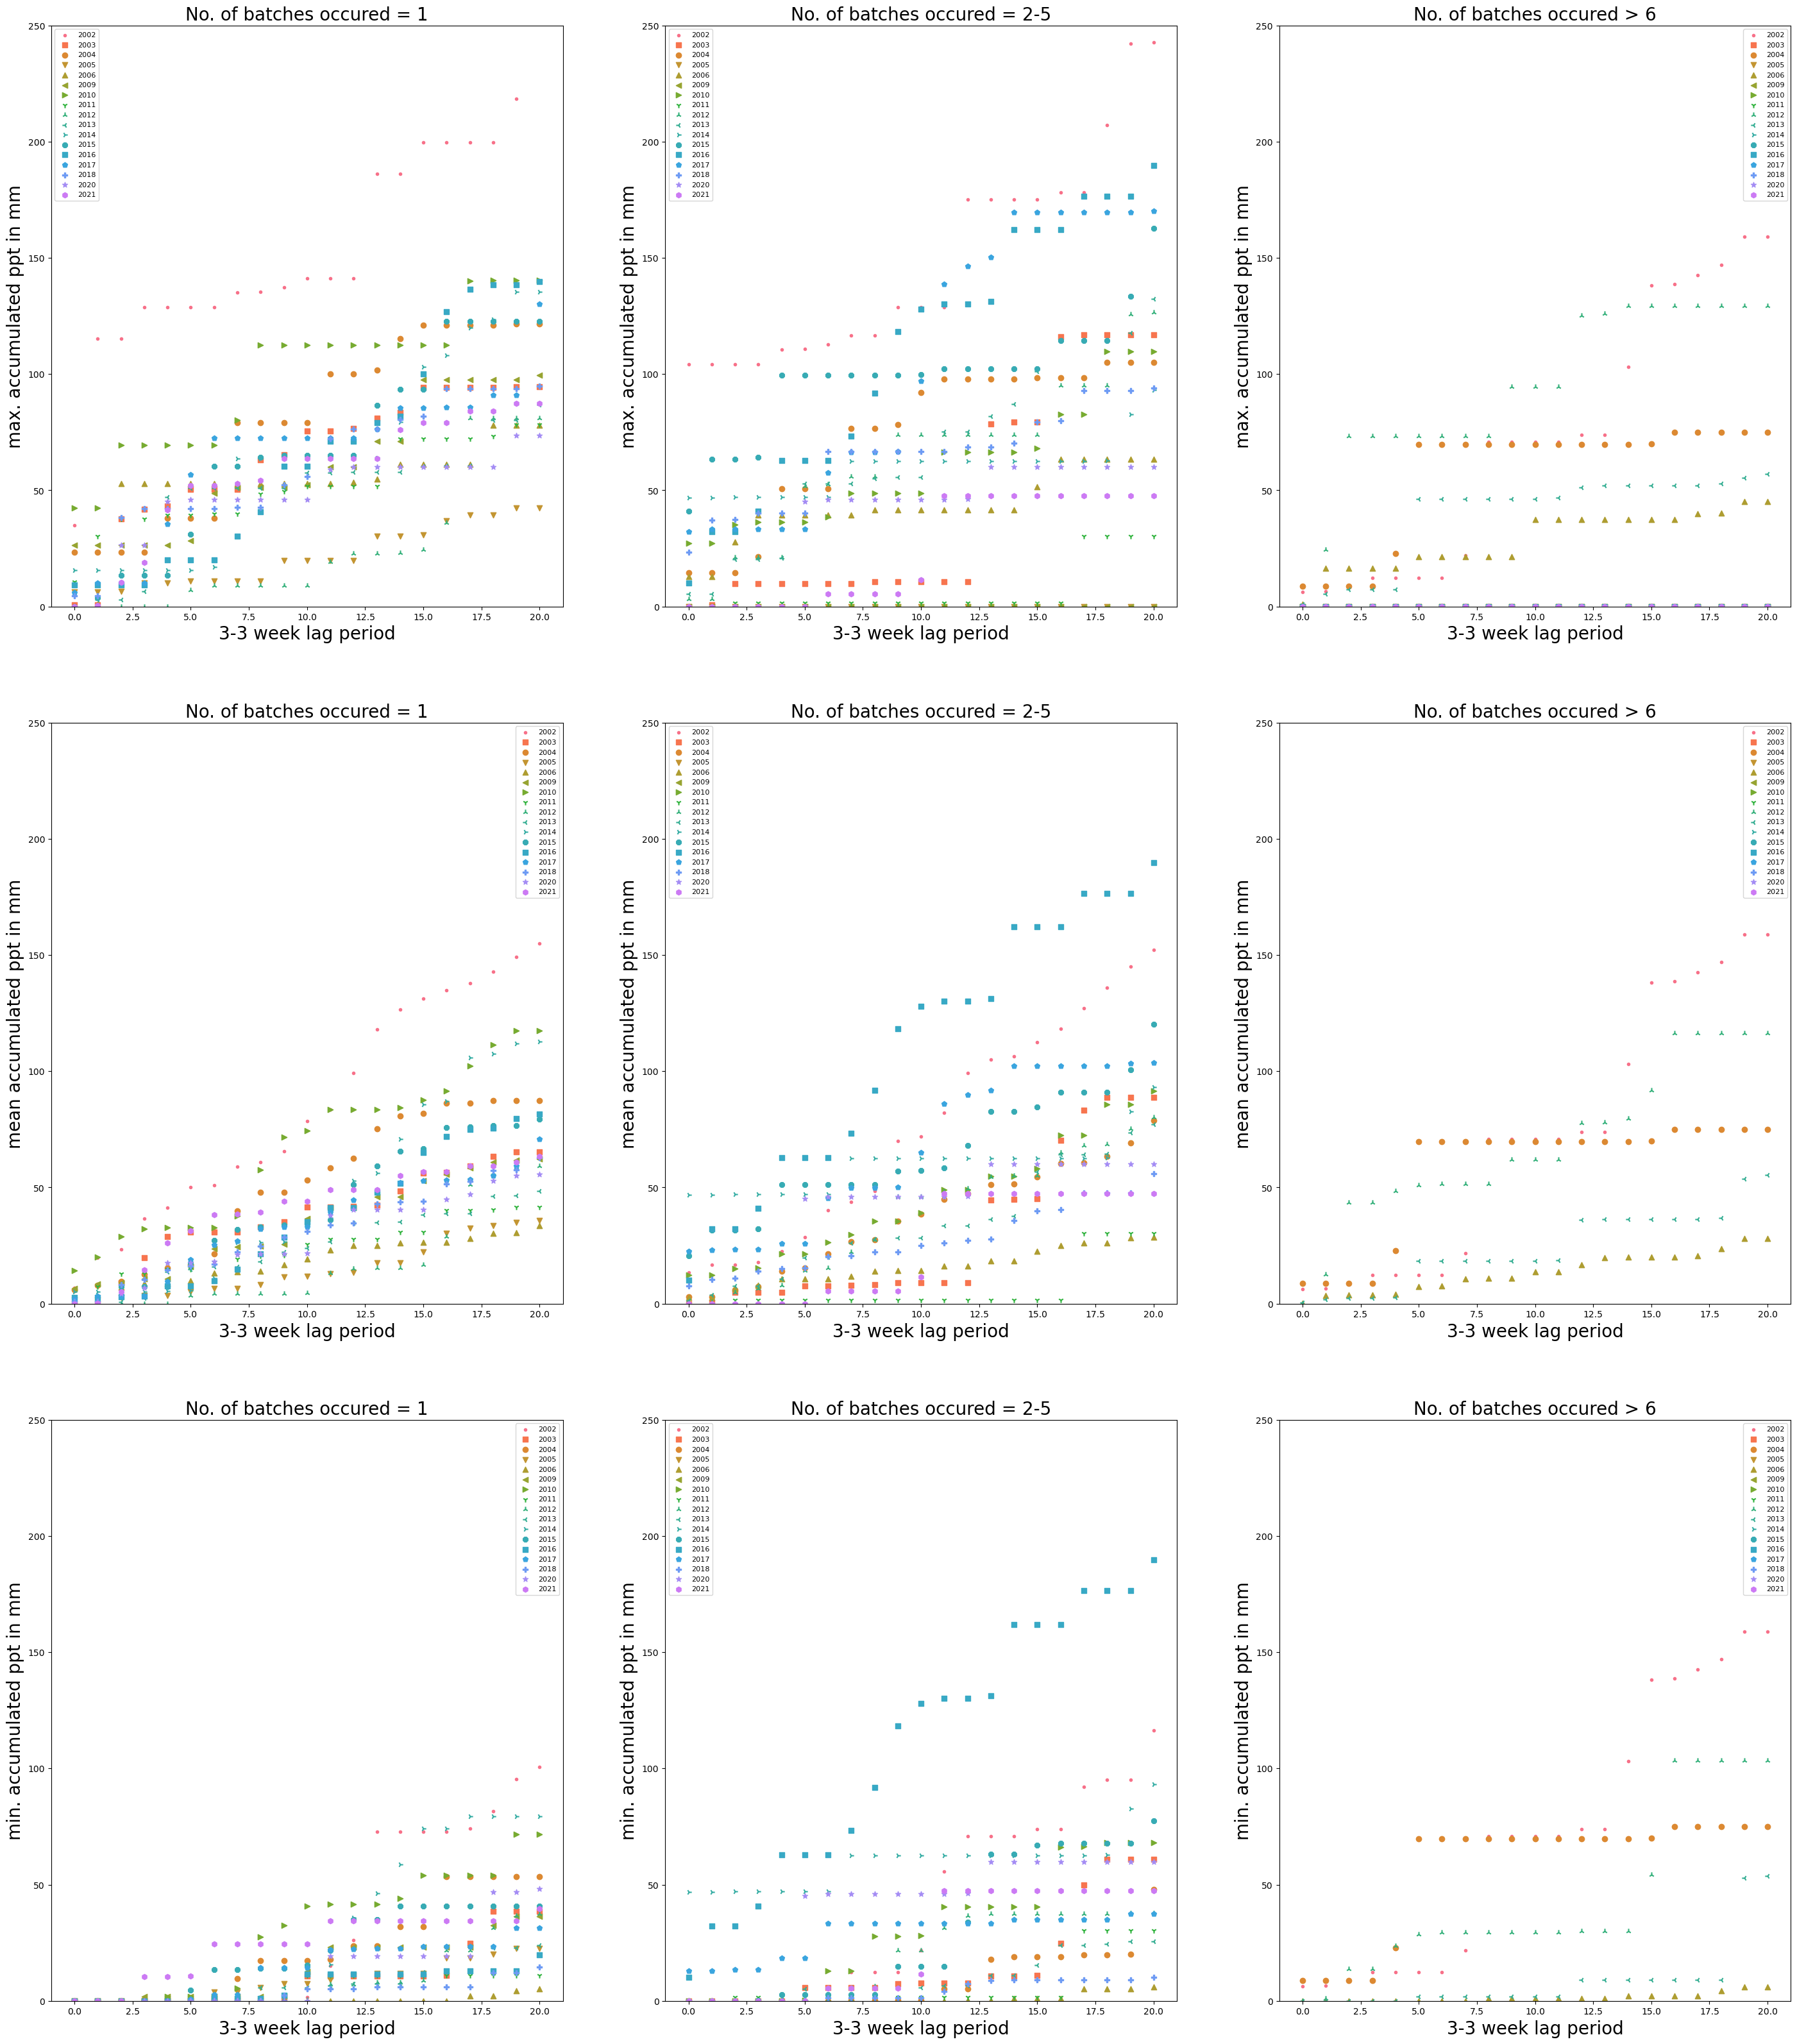

In [33]:
plot(thresh,2)

In [34]:
#To identify the frequency and duration of flat periods in 21 days period lagging to occurence of larvae
from collections import Counter
counts = []
for i in thresh:
    counti =[]
    try:
        w21_42 = np.array(i[0][1]).T.tolist() #Extracting accumulated ppt values for period 21-42 days for each  batch in a year
    except:
        pass
    for j in w21_42:
        count = Counter(j)
        counti.append(count.values())
    counts.append(counti)

In [42]:
#identify duration of flat periods in the plots of max. accumulated ppt
cflat = []
for i in stat(thresh,1)[0]:   
        c= Counter(i)
        cflat.append(c.values())

In [40]:
cflat

[dict_values([1, 1, 4, 1, 1, 1, 4, 1, 4, 2, 1]),
 dict_values([1, 2, 1, 5, 1, 6, 5]),
 dict_values([1, 1, 2, 1, 2, 1, 2, 1, 1, 4, 3, 2]),
 dict_values([2, 1, 1, 1, 4, 3, 1, 2, 1, 2, 2, 1]),
 dict_values([4, 1, 11, 1, 1, 3]),
 dict_values([4, 1, 2, 4, 2, 1, 1, 1, 1, 1, 3]),
 dict_values([2, 2, 1, 2, 3, 10, 1]),
 dict_values([1, 10, 5, 5]),
 dict_values([2, 3, 1, 4, 1, 6, 1, 1, 2]),
 dict_values([7, 4, 1, 5, 1, 1, 2]),
 dict_values([2, 7, 1, 1, 1, 2, 5, 2]),
 dict_values([1, 2, 1, 6, 1, 6, 1, 1, 1, 1]),
 dict_values([1, 2, 2, 2, 5, 3, 2, 2, 2]),
 dict_values([1, 6, 1, 13]),
 dict_values([1, 1, 1, 1, 2, 4, 1, 2, 3, 1, 4]),
 dict_values([1, 7, 1, 4, 2, 2, 1, 3]),
 dict_values([2, 2, 5, 6, 3, 1, 2])]